## Loading required packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.monospace'] = 'Ubunto Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (16,10)

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)

## Importing Train & Test dataset 

In [1150]:
train = pd.read_csv("C:/Users/ROHIT/Desktop/ML_Hackathons/Hacker_Earth_Fast_Furious/dataset/train.csv")
test = pd.read_csv("C:/Users/ROHIT/Desktop/ML_Hackathons/Hacker_Earth_Fast_Furious/test_mobilenet_1.csv")

In [1151]:
train.shape,test.shape

((1399, 8), (600, 7))

In [1152]:
train.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.00,1037.50,2026-12-03,36142.68,0,0.00
1,img_7764995.jpg,BQ,50700.00,1267.50,2025-07-10,12753.00,1,6194.00
2,img_451308.jpg,A,49500.00,1237.50,2022-08-11,43102.68,0,0.00
3,img_7768372.jpg,A,33500.00,837.50,2022-08-02,8453.00,1,7699.00
4,img_7765274.jpg,AC,27600.00,690.00,2026-05-01,6978.00,1,8849.00


In [1153]:
test.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition
0,img_4538519.jpg,B,23600,590.00,12-04-2025,5978.00,1
1,img_7766002.jpg,C,28300,707.50,24-08-2028,7153.00,1
2,img_4637390.jpg,AC,43700,1092.50,28-11-2023,11003.00,1
3,img_4516108.jpg,BB,46100,1152.50,04-02-2028,11603.00,1
4,img_4517008.jpg,BB,40700,1017.50,03-01-2022,10253.00,1


In [1154]:
test['Condition'].value_counts()

1    565
0     35
Name: Condition, dtype: int64

In [1155]:
train['Condition'].value_counts()

1    1300
0      99
Name: Condition, dtype: int64

## Data Cleaning

In [1156]:
train.isna().sum()

Image_path            0
Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64

In [1157]:
test.isna().sum()

Image_path           0
Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
Condition            0
dtype: int64

In [1158]:
df = train.copy()

In [1159]:
df.isna().sum()

Image_path            0
Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64

In [1160]:
# # Filling missing values
df = df.fillna(method='bfill', axis=0).fillna(0)

In [1161]:
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.00,1037.50,2026-12-03,36142.68,0,0.00
1,img_7764995.jpg,BQ,50700.00,1267.50,2025-07-10,12753.00,1,6194.00
2,img_451308.jpg,A,49500.00,1237.50,2022-08-11,43102.68,0,0.00
3,img_7768372.jpg,A,33500.00,837.50,2022-08-02,8453.00,1,7699.00
4,img_7765274.jpg,AC,27600.00,690.00,2026-05-01,6978.00,1,8849.00


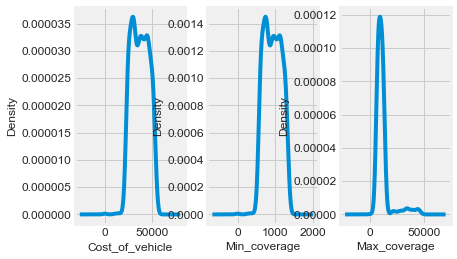

In [1162]:
plt.figure()
ax0 = plt.subplot(1,3,1)
ax1 = plt.subplot(1,3,2)
ax2 = plt.subplot(1,3,3)
df['Cost_of_vehicle'].plot(kind='kde',ax=ax0)
ax0.set_xlabel('Cost_of_vehicle')
df['Min_coverage'].plot(kind='kde',ax=ax1)
ax1.set_xlabel('Min_coverage')
df['Max_coverage'].plot(kind='kde',ax=ax2)
ax2.set_xlabel('Max_coverage')
plt.show()

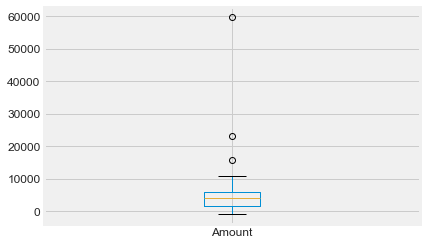

In [1163]:
df['Amount'].plot(kind='box')

In [1164]:
## Removing Outliers

out = df['Amount'] > 12000
out = np.where(out)
print(np.shape(out))
df.drop(out[0],inplace=True)
df.index = range(df.shape[0])

(1, 3)


In [1165]:
df.shape

(1396, 8)

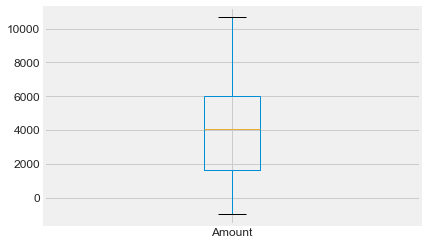

In [1166]:
df['Amount'].plot(kind='box')

In [1167]:
df[df['Amount']<0]

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
641,img_7766741.jpg,O,39700.00,992.50,2028-01-31,34576.68,1,-999.00


In [1168]:
df.drop(index = 641,inplace=True)

In [1169]:
df.shape

(1395, 8)

In [1170]:
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.00,1037.50,2026-12-03,36142.68,0,0.00
1,img_7764995.jpg,BQ,50700.00,1267.50,2025-07-10,12753.00,1,6194.00
2,img_451308.jpg,A,49500.00,1237.50,2022-08-11,43102.68,0,0.00
3,img_7768372.jpg,A,33500.00,837.50,2022-08-02,8453.00,1,7699.00
4,img_7765274.jpg,AC,27600.00,690.00,2026-05-01,6978.00,1,8849.00


## Feature Engineering

In [1171]:
df['Insurance_Comp_mean_Cost_Vehicle'] = df.groupby('Insurance_company')['Cost_of_vehicle'].transform('mean')    
df['Insurance_Comp_mean_Min_coverage'] = df.groupby('Insurance_company')['Min_coverage'].transform('mean')
df['Insurance_Comp_mean_Max_coverage'] = df.groupby('Insurance_company')['Max_coverage'].transform('mean')

df['Insurance_Comp_max_Cost_Vehicle'] = df.groupby('Insurance_company')['Cost_of_vehicle'].transform('max')    
df['Insurance_Comp_max_Min_coverage'] = df.groupby('Insurance_company')['Min_coverage'].transform('max')
df['Insurance_Comp_max_Max_coverage'] = df.groupby('Insurance_company')['Max_coverage'].transform('max')

df['Insurance_Comp_min_Cost_Vehicle'] = df.groupby('Insurance_company')['Cost_of_vehicle'].transform('min')    
df['Insurance_Comp_min_Min_coverage'] = df.groupby('Insurance_company')['Min_coverage'].transform('min')
df['Insurance_Comp_min_Max_coverage'] = df.groupby('Insurance_company')['Max_coverage'].transform('min')


df['Expiry_Date_mean_Cost_Vehicle'] = df.groupby('Expiry_date')['Cost_of_vehicle'].transform('mean')    
df['Expiry_Date_mean_Min_coverage'] = df.groupby('Expiry_date')['Min_coverage'].transform('mean')
df['Expiry_Date_mean_Max_coverage'] = df.groupby('Expiry_date')['Max_coverage'].transform('mean')

df['Cat_Cost_of_vehicle'] = pd.qcut(df.Cost_of_vehicle, q=8, labels=False )
df['Cat_Min_coverage'] = pd.qcut(df.Min_coverage, q=8, labels=False )
df['Cat_Max_coverage'] = pd.qcut(df.Max_coverage, q=8, labels=False )

df['Combined_Insurance_company'] = df['Insurance_company'].map({'A':'a','B':'b','C':'c','O':'o',
                                                     'AA':'a','BB':'b','BQ':'b',
                                                     'DA':'a','BC':'c','AC':'c','RE':'o'})

df['Combined_Insurance_mean_Cost_Vehicle'] = df.groupby('Combined_Insurance_company')['Cost_of_vehicle'].transform('mean')    
df['Combined_Insurance_mean_Min_coverage'] = df.groupby('Combined_Insurance_company')['Min_coverage'].transform('mean')
df['Combined_Insurance_mean_Max_coverage'] = df.groupby('Combined_Insurance_company')['Max_coverage'].transform('mean')



In [1172]:
from datetime import datetime

today = datetime.today().date()
df['Expiry_date'] = pd.to_datetime(df['Expiry_date']).dt.date
df['Expiry_month'] = df.Expiry_date.apply(lambda x: x.month)
df['Expiry_day'] = df.Expiry_date.apply(lambda x: x.day)
df['Expiry_year'] = df.Expiry_date.apply(lambda x: x.year)

df['Diff_Expiry_date_Current_date'] = (df['Expiry_date'] - today).astype('timedelta64[D]').astype(int)

df['Diff_year'] = df['Expiry_year'] - 2021

df['Expiry_year_max_Cost_Vehicle'] = df.groupby('Expiry_year')['Cost_of_vehicle'].transform('max')    
df['Expiry_year_max_Min_coverage'] = df.groupby('Expiry_year')['Min_coverage'].transform('max')
df['Expiry_year_max_Max_coverage'] = df.groupby('Expiry_year')['Max_coverage'].transform('max')

df['Expiry_year_min_Cost_Vehicle'] = df.groupby('Expiry_year')['Cost_of_vehicle'].transform('min')    
df['Expiry_year_min_Min_coverage'] = df.groupby('Expiry_year')['Min_coverage'].transform('min')
df['Expiry_year_min_Max_coverage'] = df.groupby('Expiry_year')['Max_coverage'].transform('min')

df['Expiry_month_mean_Cost_Vehicle'] = df.groupby('Expiry_month')['Cost_of_vehicle'].transform('mean')    
df['Expiry_month_mean_Min_coverage'] = df.groupby('Expiry_month')['Min_coverage'].transform('mean')
df['Expiry_month_mean_Max_coverage'] = df.groupby('Expiry_month')['Max_coverage'].transform('mean')

df['Expiry_day_mean_Cost_Vehicle'] = df.groupby('Expiry_day')['Cost_of_vehicle'].transform('mean')    
df['Expiry_day_mean_Min_coverage'] = df.groupby('Expiry_day')['Min_coverage'].transform('mean')
df['Expiry_day_mean_Max_coverage'] = df.groupby('Expiry_day')['Max_coverage'].transform('mean')

df['Expiry_date'] = pd.to_datetime(df['Expiry_date'], errors='coerce')

In [1173]:
def create_features(df, label=None,seg=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.Expiry_date
    df['Expiry_dayofweek'] = df['date'].dt.dayofweek
    df['Expiry_quarter'] = df['date'].dt.quarter
    df['Expiry_month'] = df['date'].dt.month
    df['Expiry_year'] = df['date'].dt.year
    df['Expiry_dayofyear'] = df['date'].dt.dayofyear
    df['Expiry_dayofmonth'] = df['date'].dt.day
    df['Expiry_week'] = df['date'].dt.week
    df['Expiry_is_month_start']=df['date'].dt.is_month_start
    df['Expiry_is_month_end']=df['date'].dt.is_month_end
    df['Expiry_is_quarter_start']=df['date'].dt.is_quarter_start
    df['Expiry_is_quarter_end']=df['date'].dt.is_quarter_end
    df['Expiry_is_year_start']=df['date'].dt.is_year_start
    df['Expiry_is_year_end']=df['date'].dt.is_year_end
    df['Expiry_Semester'] = np.where(df['Expiry_quarter'].isin([1,2]),1,2)
    
    X = df.drop(['date','Expiry_date','Expiry_month','Expiry_year','Expiry_dayofmonth', 
                 'Expiry_quarter', 'Expiry_dayofyear', 'Expiry_week', 'Expiry_is_month_start', 'Expiry_is_month_end', 
                 'Expiry_is_quarter_start', 'Expiry_is_quarter_end', 'Expiry_is_year_end','Expiry_Semester'],axis=1)
    
    if label:
        y = df[label]
        return X
    return X

In [1174]:
df = create_features(df)

In [1176]:
df.replace({False: 0, True: 1}, inplace=True)

In [1177]:
df_dum = pd.get_dummies(df['Insurance_company'])
train_df = pd.concat([df,df_dum],axis=1)
train_df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Insurance_Comp_mean_Cost_Vehicle,Insurance_Comp_mean_Min_coverage,Insurance_Comp_mean_Max_coverage,Insurance_Comp_max_Cost_Vehicle,Insurance_Comp_max_Min_coverage,Insurance_Comp_max_Max_coverage,Insurance_Comp_min_Cost_Vehicle,Insurance_Comp_min_Min_coverage,Insurance_Comp_min_Max_coverage,Expiry_Date_mean_Cost_Vehicle,Expiry_Date_mean_Min_coverage,Expiry_Date_mean_Max_coverage,Cat_Cost_of_vehicle,Cat_Min_coverage,Cat_Max_coverage,Combined_Insurance_company,Combined_Insurance_mean_Cost_Vehicle,Combined_Insurance_mean_Min_coverage,Combined_Insurance_mean_Max_coverage,Expiry_day,Diff_Expiry_date_Current_date,Diff_year,Expiry_year_max_Cost_Vehicle,Expiry_year_max_Min_coverage,Expiry_year_max_Max_coverage,Expiry_year_min_Cost_Vehicle,Expiry_year_min_Min_coverage,Expiry_year_min_Max_coverage,Expiry_month_mean_Cost_Vehicle,Expiry_month_mean_Min_coverage,Expiry_month_mean_Max_coverage,Expiry_day_mean_Cost_Vehicle,Expiry_day_mean_Min_coverage,Expiry_day_mean_Max_coverage,Expiry_dayofweek,Expiry_is_year_start,A,AA,AC,B,BB,BC,BQ,C,DA,O,RE
0,img_4513976.jpg,BQ,41500.00,1037.50,36142.68,0,0.00,38414.62,960.37,11988.15,53500.00,1337.50,45103.68,20000.00,500.00,5078.00,41500.00,1037.50,36142.68,5,5,7,b,37261.60,931.54,11120.93,3,1995,5,53500.00,1337.50,44929.68,23100.00,577.50,5853.00,37679.50,941.99,11287.73,36654.00,916.35,11666.63,3,0,0,0,0,0,0,0,1,0,0,0,0
1,img_7764995.jpg,BQ,50700.00,1267.50,12753.00,1,6194.00,38414.62,960.37,11988.15,53500.00,1337.50,45103.68,20000.00,500.00,5078.00,50700.00,1267.50,12753.00,7,7,6,b,37261.60,931.54,11120.93,10,1484,4,53500.00,1337.50,44407.68,22900.00,572.50,5803.00,36745.38,918.63,10810.77,37946.34,948.66,12128.36,3,0,0,0,0,0,0,0,1,0,0,0,0
2,img_451308.jpg,A,49500.00,1237.50,43102.68,0,0.00,38166.67,954.17,11748.73,53500.00,1337.50,46495.68,22800.00,570.00,5778.00,49850.00,1246.25,43407.18,7,7,7,a,37461.52,936.54,11529.66,11,420,1,53500.00,1337.50,45364.68,20000.00,500.00,5078.00,37219.00,930.48,10905.53,37053.06,926.33,13140.28,3,0,1,0,0,0,0,0,0,0,0,0,0
3,img_7768372.jpg,A,33500.00,837.50,8453.00,1,7699.00,38166.67,954.17,11748.73,53500.00,1337.50,46495.68,22800.00,570.00,5778.00,33500.00,837.50,8453.00,3,3,2,a,37461.52,936.54,11529.66,2,411,1,53500.00,1337.50,45364.68,20000.00,500.00,5078.00,37219.00,930.48,10905.53,37656.25,941.41,13942.69,1,0,1,0,0,0,0,0,0,0,0,0,0
4,img_7765274.jpg,AC,27600.00,690.00,6978.00,1,8849.00,37847.90,946.20,10918.28,53500.00,1337.50,44929.68,15000.00,375.00,3828.00,27600.00,690.00,6978.00,1,1,1,c,37434.77,935.87,11102.63,1,1779,5,53500.00,1337.50,44929.68,23100.00,577.50,5853.00,37820.72,945.52,11661.57,37184.21,929.61,9802.10,4,0,0,0,1,0,0,0,0,0,0,0,0


In [1178]:
df_dum = pd.get_dummies(df['Combined_Insurance_company'])
train_df = pd.concat([train_df,df_dum],axis=1)
train_df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Insurance_Comp_mean_Cost_Vehicle,Insurance_Comp_mean_Min_coverage,Insurance_Comp_mean_Max_coverage,Insurance_Comp_max_Cost_Vehicle,Insurance_Comp_max_Min_coverage,Insurance_Comp_max_Max_coverage,Insurance_Comp_min_Cost_Vehicle,Insurance_Comp_min_Min_coverage,Insurance_Comp_min_Max_coverage,Expiry_Date_mean_Cost_Vehicle,Expiry_Date_mean_Min_coverage,Expiry_Date_mean_Max_coverage,Cat_Cost_of_vehicle,Cat_Min_coverage,Cat_Max_coverage,Combined_Insurance_company,Combined_Insurance_mean_Cost_Vehicle,Combined_Insurance_mean_Min_coverage,Combined_Insurance_mean_Max_coverage,Expiry_day,Diff_Expiry_date_Current_date,Diff_year,Expiry_year_max_Cost_Vehicle,Expiry_year_max_Min_coverage,Expiry_year_max_Max_coverage,Expiry_year_min_Cost_Vehicle,Expiry_year_min_Min_coverage,Expiry_year_min_Max_coverage,Expiry_month_mean_Cost_Vehicle,Expiry_month_mean_Min_coverage,Expiry_month_mean_Max_coverage,Expiry_day_mean_Cost_Vehicle,Expiry_day_mean_Min_coverage,Expiry_day_mean_Max_coverage,Expiry_dayofweek,Expiry_is_year_start,A,AA,AC,B,BB,BC,BQ,C,DA,O,RE,a,b,c,o
0,img_4513976.jpg,BQ,41500.00,1037.50,36142.68,0,0.00,38414.62,960.37,11988.15,53500.00,1337.50,45103.68,20000.00,500.00,5078.00,41500.00,1037.50,36142.68,5,5,7,b,37261.60,931.54,11120.93,3,1995,5,53500.00,1337.50,44929.68,23100.00,577.50,5853.00,37679.50,941.99,11287.73,36654.00,916.35,11666.63,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,img_7764995.jpg,BQ,50700.00,1267.50,12753.00,1,6194.00,38414.62,960.37,11988.15,53500.00,1337.50,45103.68,20000.00,500.00,5078.00,50700.00,1267.50,12753.00,7,7,6,b,37261.60,931.54,11120.93,10,1484,4,53500.00,1337.50,44407.68,22900.00,572.50,5803.00,36745.38,918.63,10810.77,37946.34,948.66,12128.36,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,img_451308.jpg,A,49500.00,1237.50,43102.68,0,0.00,38166.67,954.17,11748.73,53500.00,1337.50,46495.68,22800.00,570.00,5778.00,49850.00,1246.25,43407.18,7,7,7,a,37461.52,936.54,11529.66,11,420,1,53500.00,1337.50,45364.68,20000.00,500.00,5078.00,37219.00,930.48,10905.53,37053.06,926.33,13140.28,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,img_7768372.jpg,A,33500.00,837.50,8453.00,1,7699.00,38166.67,954.17,11748.73,53500.00,1337.50,46495.68,22800.00,570.00,5778.00,33500.00,837.50,8453.00,3,3,2,a,37461.52,936.54,11529.66,2,411,1,53500.00,1337.50,45364.68,20000.00,500.00,5078.00,37219.00,930.48,10905.53,37656.25,941.41,13942.69,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,img_7765274.jpg,AC,27600.00,690.00,6978.00,1,8849.00,37847.90,946.20,10918.28,53500.00,1337.50,44929.68,15000.00,375.00,3828.00,27600.00,690.00,6978.00,1,1,1,c,37434.77,935.87,11102.63,1,1779,5,53500.00,1337.50,44929.68,23100.00,577.50,5853.00,37820.72,945.52,11661.57,37184.21,929.61,9802.10,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [1179]:
train_df.drop(['Insurance_company','Image_path','Condition','Combined_Insurance_company','Cat_Min_coverage'],inplace=True,axis=1)

In [1180]:
train_df = train_df.rename(columns={'A': 'Insurance_company_A', 'AA': 'Insurance_company_AA',
                                 'AC': 'Insurance_company_AC', 'B': 'Insurance_company_B',
                                 'BB': 'Insurance_company_BB', 'BC': 'Insurance_company_BC',
                                 'BQ': 'Insurance_company_BQ', 'C': 'Insurance_company_C',
                                  'DA': 'Insurance_company_DA', 'O': 'Insurance_company_O',
                                  'RE': 'Insurance_company_RE',
                                  'a': 'Combined_Insurance_company_a', 'b': 'Combined_Insurance_company_b',
                                  'c': 'Combined_Insurance_company_c', 'o': 'Combined_Insurance_company_o'
                                 })

In [1181]:
train_df.head()

,Cost_of_vehicle,Min_coverage,Max_coverage,Amount,Insurance_Comp_mean_Cost_Vehicle,Insurance_Comp_mean_Min_coverage,Insurance_Comp_mean_Max_coverage,Insurance_Comp_max_Cost_Vehicle,Insurance_Comp_max_Min_coverage,Insurance_Comp_max_Max_coverage,Insurance_Comp_min_Cost_Vehicle,Insurance_Comp_min_Min_coverage,Insurance_Comp_min_Max_coverage,Expiry_Date_mean_Cost_Vehicle,Expiry_Date_mean_Min_coverage,Expiry_Date_mean_Max_coverage,Cat_Cost_of_vehicle,Cat_Max_coverage,Combined_Insurance_mean_Cost_Vehicle,Combined_Insurance_mean_Min_coverage,Combined_Insurance_mean_Max_coverage,Expiry_day,Diff_Expiry_date_Current_date,Diff_year,Expiry_year_max_Cost_Vehicle,Expiry_year_max_Min_coverage,Expiry_year_max_Max_coverage,Expiry_year_min_Cost_Vehicle,Expiry_year_min_Min_coverage,Expiry_year_min_Max_coverage,Expiry_month_mean_Cost_Vehicle,Expiry_month_mean_Min_coverage,Expiry_month_mean_Max_coverage,Expiry_day_mean_Cost_Vehicle,Expiry_day_mean_Min_coverage,Expiry_day_mean_Max_coverage,Expiry_dayofweek,Expiry_is_year_start,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE,Combined_Insurance_company_a,Combined_Insurance_company_b,Combined_Insurance_company_c,Combined_Insurance_company_o
0,41500.00,1037.50,36142.68,0.00,38414.62,960.37,11988.15,53500.00,1337.50,45103.68,20000.00,500.00,5078.00,41500.00,1037.50,36142.68,5,7,37261.60,931.54,11120.93,3,1995,5,53500.00,1337.50,44929.68,23100.00,577.50,5853.00,37679.50,941.99,11287.73,36654.00,916.35,11666.63,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,50700.00,1267.50,12753.00,6194.00,38414.62,960.37,11988.15,53500.00,1337.50,45103.68,20000.00,500.00,5078.00,50700.00,1267.50,12753.00,7,6,37261.60,931.54,11120.93,10,1484,4,53500.00,1337.50,44407.68,22900.00,572.50,5803.00,36745.38,918.63,10810.77,37946.34,948.66,12128.36,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,49500.00,1237.50,43102.68,0.00,38166.67,954.17,11748.73,53500.00,1337.50,46495.68,22800.00,570.00,5778.00,49850.00,1246.25,43407.18,7,7,37461.52,936.54,11529.66,11,420,1,53500.00,1337.50,45364.68,20000.00,500.00,5078.00,37219.00,930.48,10905.53,37053.06,926.33,13140.28,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,33500.00,837.50,8453.00,7699.00,38166.67,954.17,11748.73,53500.00,1337.50,46495.68,22800.00,570.00,5778.00,33500.00,837.50,8453.00,3,2,37461.52,936.54,11529.66,2,411,1,53500.00,1337.50,45364.68,20000.00,500.00,5078.00,37219.00,930.48,10905.53,37656.25,941.41,13942.69,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,27600.00,690.00,6978.00,8849.00,37847.90,946.20,10918.28,53500.00,1337.50,44929.68,15000.00,375.00,3828.00,27600.00,690.00,6978.00,1,1,37434.77,935.87,11102.63,1,1779,5,53500.00,1337.50,44929.68,23100.00,577.50,5853.00,37820.72,945.52,11661.57,37184.21,929.61,9802.10,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [1183]:
test.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition
0,img_4538519.jpg,B,23600,590.00,12-04-2025,5978.00,1
1,img_7766002.jpg,C,28300,707.50,24-08-2028,7153.00,1
2,img_4637390.jpg,AC,43700,1092.50,28-11-2023,11003.00,1
3,img_4516108.jpg,BB,46100,1152.50,04-02-2028,11603.00,1
4,img_4517008.jpg,BB,40700,1017.50,03-01-2022,10253.00,1


In [1184]:
df_dum = pd.get_dummies(test['Insurance_company'])
df_test = pd.concat([test,df_dum],axis=1)

In [1185]:
df_test['Combined_Insurance_company'] = df_test['Insurance_company'].map({'A':'a','B':'b','C':'c','O':'o',
                                                     'AA':'a','BB':'b','BQ':'b',
                                                     'DA':'a','BC':'c','AC':'c','RE':'o'})



In [1186]:
df_dum = pd.get_dummies(df_test['Combined_Insurance_company'])
df_test = pd.concat([df_test,df_dum],axis=1)


In [1187]:
df_test['Insurance_Comp_mean_Cost_Vehicle'] = df_test.groupby('Insurance_company')['Cost_of_vehicle'].transform('mean')    
df_test['Insurance_Comp_mean_Min_coverage'] = df_test.groupby('Insurance_company')['Min_coverage'].transform('mean')
df_test['Insurance_Comp_mean_Max_coverage'] = df_test.groupby('Insurance_company')['Max_coverage'].transform('mean')

df_test['Insurance_Comp_max_Cost_Vehicle'] = df_test.groupby('Insurance_company')['Cost_of_vehicle'].transform('max')    
df_test['Insurance_Comp_max_Min_coverage'] = df_test.groupby('Insurance_company')['Min_coverage'].transform('max')
df_test['Insurance_Comp_max_Max_coverage'] = df_test.groupby('Insurance_company')['Max_coverage'].transform('max')

df_test['Insurance_Comp_min_Cost_Vehicle'] = df_test.groupby('Insurance_company')['Cost_of_vehicle'].transform('min')    
df_test['Insurance_Comp_min_Min_coverage'] = df_test.groupby('Insurance_company')['Min_coverage'].transform('min')
df_test['Insurance_Comp_min_Max_coverage'] = df_test.groupby('Insurance_company')['Max_coverage'].transform('min')



df_test['Expiry_Date_mean_Cost_Vehicle'] = df_test.groupby('Expiry_date')['Cost_of_vehicle'].transform('mean')    
df_test['Expiry_Date_mean_Min_coverage'] = df_test.groupby('Expiry_date')['Min_coverage'].transform('mean')
df_test['Expiry_Date_mean_Max_coverage'] = df_test.groupby('Expiry_date')['Max_coverage'].transform('mean')

df_test['Cat_Cost_of_vehicle'] = pd.qcut(df_test.Cost_of_vehicle, q=8, labels=False )
df_test['Cat_Min_coverage'] = pd.qcut(df_test.Min_coverage, q=8, labels=False )
df_test['Cat_Max_coverage'] = pd.qcut(df_test.Max_coverage, q=8, labels=False )


df_test['Combined_Insurance_mean_Cost_Vehicle'] = df_test.groupby('Combined_Insurance_company')['Cost_of_vehicle'].transform('mean')    
df_test['Combined_Insurance_mean_Min_coverage'] = df_test.groupby('Combined_Insurance_company')['Min_coverage'].transform('mean')
df_test['Combined_Insurance_mean_Max_coverage'] = df_test.groupby('Combined_Insurance_company')['Max_coverage'].transform('mean')



In [1188]:
df_test['Expiry_date'] = pd.to_datetime(df_test['Expiry_date']).dt.date
df_test['Expiry_month'] = df_test.Expiry_date.apply(lambda x: x.month)
df_test['Expiry_day'] = df_test.Expiry_date.apply(lambda x: x.day)
df_test['Expiry_year'] = df_test.Expiry_date.apply(lambda x: x.year)


df_test['Diff_Expiry_date_Current_date'] = (df_test['Expiry_date'] - today).astype('timedelta64[D]').astype(int)
df_test['Diff_year'] = df_test['Expiry_year'] - 2021

df_test['Expiry_year_max_Cost_Vehicle'] = df_test.groupby('Expiry_year')['Cost_of_vehicle'].transform('max')    
df_test['Expiry_year_max_Min_coverage'] = df_test.groupby('Expiry_year')['Min_coverage'].transform('max')
df_test['Expiry_year_max_Max_coverage'] = df_test.groupby('Expiry_year')['Max_coverage'].transform('max')

df_test['Expiry_year_min_Cost_Vehicle'] = df_test.groupby('Expiry_year')['Cost_of_vehicle'].transform('min')    
df_test['Expiry_year_min_Min_coverage'] = df_test.groupby('Expiry_year')['Min_coverage'].transform('min')
df_test['Expiry_year_min_Max_coverage'] = df_test.groupby('Expiry_year')['Max_coverage'].transform('min')

df_test['Expiry_month_mean_Cost_Vehicle'] = df_test.groupby('Expiry_month')['Cost_of_vehicle'].transform('mean')    
df_test['Expiry_month_mean_Min_coverage'] = df_test.groupby('Expiry_month')['Min_coverage'].transform('mean')
df_test['Expiry_month_mean_Max_coverage'] = df_test.groupby('Expiry_month')['Max_coverage'].transform('mean')

df_test['Expiry_day_mean_Cost_Vehicle'] = df_test.groupby('Expiry_day')['Cost_of_vehicle'].transform('mean')    
df_test['Expiry_day_mean_Min_coverage'] = df_test.groupby('Expiry_day')['Min_coverage'].transform('mean')
df_test['Expiry_day_mean_Max_coverage'] = df_test.groupby('Expiry_day')['Max_coverage'].transform('mean')

df_test['Expiry_date'] = pd.to_datetime(df_test['Expiry_date'], errors='coerce')

In [1189]:
df_test = create_features(df_test)

In [1191]:
df_test.replace({False: 0, True: 1}, inplace=True)

In [1192]:
df_test.drop(['Insurance_company','Image_path','Condition','Combined_Insurance_company','Cat_Min_coverage'],inplace=True,axis=1)

In [1193]:
df_test = df_test.rename(columns={'A': 'Insurance_company_A', 'AA': 'Insurance_company_AA',
                                 'AC': 'Insurance_company_AC', 'B': 'Insurance_company_B',
                                 'BB': 'Insurance_company_BB', 'BC': 'Insurance_company_BC',
                                 'BQ': 'Insurance_company_BQ', 'C': 'Insurance_company_C',
                                  'DA': 'Insurance_company_DA', 'O': 'Insurance_company_O',
                                  'RE': 'Insurance_company_RE',
                                  'a': 'Combined_Insurance_company_a', 'b': 'Combined_Insurance_company_b',
                                  'c': 'Combined_Insurance_company_c', 'o': 'Combined_Insurance_company_o'
                                 })

In [1194]:
df_test.head()

,Cost_of_vehicle,Min_coverage,Max_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE,Combined_Insurance_company_a,Combined_Insurance_company_b,Combined_Insurance_company_c,Combined_Insurance_company_o,Insurance_Comp_mean_Cost_Vehicle,Insurance_Comp_mean_Min_coverage,Insurance_Comp_mean_Max_coverage,Insurance_Comp_max_Cost_Vehicle,Insurance_Comp_max_Min_coverage,Insurance_Comp_max_Max_coverage,Insurance_Comp_min_Cost_Vehicle,Insurance_Comp_min_Min_coverage,Insurance_Comp_min_Max_coverage,Expiry_Date_mean_Cost_Vehicle,Expiry_Date_mean_Min_coverage,Expiry_Date_mean_Max_coverage,Cat_Cost_of_vehicle,Cat_Max_coverage,Combined_Insurance_mean_Cost_Vehicle,Combined_Insurance_mean_Min_coverage,Combined_Insurance_mean_Max_coverage,Expiry_day,Diff_Expiry_date_Current_date,Diff_year,Expiry_year_max_Cost_Vehicle,Expiry_year_max_Min_coverage,Expiry_year_max_Max_coverage,Expiry_year_min_Cost_Vehicle,Expiry_year_min_Min_coverage,Expiry_year_min_Max_coverage,Expiry_month_mean_Cost_Vehicle,Expiry_month_mean_Min_coverage,Expiry_month_mean_Max_coverage,Expiry_day_mean_Cost_Vehicle,Expiry_day_mean_Min_coverage,Expiry_day_mean_Max_coverage,Expiry_dayofweek,Expiry_is_year_start
0,23600,590.00,5978.00,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,37528.81,938.22,9460.20,53400,1335.00,13428.00,22800,570.00,5778.00,23600.00,590.00,5978.00,0,0,37914.04,947.85,11268.67,4,1631,4,53300,1332.50,44755.68,23200,580.00,5878.00,38498.28,962.46,10851.76,36605.00,915.12,9229.25,3,0
1,28300,707.50,7153.00,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,39858.33,996.46,12867.15,53400,1335.00,44755.68,22800,570.00,5778.00,28300.00,707.50,7153.00,1,1,39297.39,982.43,11517.38,24,2625,7,79200,1980.00,44929.68,22800,570.00,5778.00,38298.15,957.45,13013.68,38042.86,951.07,11024.60,3,0
2,43700,1092.50,11003.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,38664.00,966.60,10801.35,53100,1327.50,45016.68,20000,500.00,5078.00,43700.00,1092.50,11003.00,5,5,39297.39,982.43,11517.38,28,894,2,53500,1337.50,35272.68,23000,575.00,5828.00,39323.26,983.08,11359.40,37686.67,942.17,10524.11,1,0
3,46100,1152.50,11603.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,38731.34,968.28,12850.79,53500,1337.50,44842.68,22600,565.00,5728.00,46100.00,1152.50,11603.00,6,5,37914.04,947.85,11268.67,2,2481,7,79200,1980.00,44929.68,22800,570.00,5778.00,37169.05,929.23,9764.92,39921.74,998.04,11914.93,6,0
4,40700,1017.50,10253.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,38731.34,968.28,12850.79,53500,1337.50,44842.68,22600,565.00,5728.00,40700.00,1017.50,10253.00,4,4,37914.04,947.85,11268.67,1,257,1,53400,1335.00,45103.68,20000,500.00,5078.00,37834.69,945.87,9842.05,39484.21,987.11,15331.30,1,0


## Data modelling 

In [1196]:
X = train_df.drop(['Amount'],axis=1)
Y = train_df[['Amount']]

In [1197]:
from sklearn.compose import make_column_transformer

features_num = ['Cost_of_vehicle', 'Min_coverage', 'Max_coverage', 'Insurance_company_A', 'Insurance_company_AA', 'Insurance_company_AC', 'Insurance_company_B', 'Insurance_company_BB', 'Insurance_company_BC', 'Insurance_company_BQ', 'Insurance_company_C', 'Insurance_company_DA', 'Insurance_company_O', 'Insurance_company_RE', 'Combined_Insurance_company_a', 'Combined_Insurance_company_b',
       'Combined_Insurance_company_c', 'Combined_Insurance_company_o', 'Insurance_Comp_mean_Cost_Vehicle', 'Insurance_Comp_mean_Min_coverage', 'Insurance_Comp_mean_Max_coverage', 'Insurance_Comp_max_Cost_Vehicle', 'Insurance_Comp_max_Min_coverage', 'Insurance_Comp_max_Max_coverage', 'Insurance_Comp_min_Cost_Vehicle', 'Insurance_Comp_min_Min_coverage', 'Insurance_Comp_min_Max_coverage',
       'Expiry_Date_mean_Cost_Vehicle', 'Expiry_Date_mean_Min_coverage', 'Expiry_Date_mean_Max_coverage', 'Cat_Cost_of_vehicle', 'Cat_Max_coverage', 'Combined_Insurance_mean_Cost_Vehicle', 'Combined_Insurance_mean_Min_coverage', 'Combined_Insurance_mean_Max_coverage', 'Expiry_day', 'Diff_Expiry_date_Current_date', 'Diff_year', 'Expiry_year_max_Cost_Vehicle', 'Expiry_year_max_Min_coverage',
       'Expiry_year_max_Max_coverage', 'Expiry_year_min_Cost_Vehicle', 'Expiry_year_min_Min_coverage', 'Expiry_year_min_Max_coverage', 'Expiry_month_mean_Cost_Vehicle', 'Expiry_month_mean_Min_coverage', 'Expiry_month_mean_Max_coverage', 'Expiry_day_mean_Cost_Vehicle', 'Expiry_day_mean_Min_coverage', 'Expiry_day_mean_Max_coverage', 'Expiry_dayofweek', 'Expiry_is_year_start']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
)

train_X = preprocessor.fit_transform(X)

test_X = preprocessor.transform(df_test)


In [1199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_X,Y,train_size=0.8,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1116, 52) (1116, 1)
(279, 52) (279, 1)


In [1206]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1, n_estimators = 1000, max_depth=3)
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
print(100*r2_score(y_train,y_train_pred))
print(max(0,100*r2_score(y_test,y_test_pred)))

19.624311051862108
19.32851258697883


In [1207]:
rf_val_mae = mean_absolute_error(y_test,y_test_pred)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 1872.5102608156776


In [1209]:
predicted = rf.predict(test_X)

In [1211]:
test['Amount'] = predicted

In [1212]:
test.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4538519.jpg,B,23600,590.00,12-04-2025,5978.00,1,4285.08
1,img_7766002.jpg,C,28300,707.50,24-08-2028,7153.00,1,4268.11
2,img_4637390.jpg,AC,43700,1092.50,28-11-2023,11003.00,1,4437.61
3,img_4516108.jpg,BB,46100,1152.50,04-02-2028,11603.00,1,4327.46
4,img_4517008.jpg,BB,40700,1017.50,03-01-2022,10253.00,1,4051.61


In [1213]:
for i in range(test.shape[0]):
    if test['Condition'][i] == 0:
        test['Amount'][i] = 0
        

In [1214]:
test.shape

(600, 8)

In [1215]:
submission = test[['Image_path','Condition','Amount']]
submission.head()

,Image_path,Condition,Amount
0,img_4538519.jpg,1,4285.08
1,img_7766002.jpg,1,4268.11
2,img_4637390.jpg,1,4437.61
3,img_4516108.jpg,1,4327.46
4,img_4517008.jpg,1,4051.61


In [1216]:
submission.to_csv('submission_modelV12_3.csv', index=False)